In [1]:
from IPython.display import Image

# 11. 레이블되지 않은 데이터 다루기: 군집 분석
* k-평균 알고리즘을 사용하여 클러스터 중심 찾기
* 상향식 방법으로 계층적 군집 트리 만들기
* 밀집도 기반의 군집 알고리즘을 사용하여 임의의 모양을 가진 대상 구분하기

# 11.1 k-평균 알고리즘을 사용하여 유사한 객체 그룹핑
* 군집 : 비슷한 객체로 이루어진 그룹을 찾는 기법
    * 한 그룹 안의 객체들은 다른 그룹에 있는 객체보다 더 관련되어 있다.

### 11.1.1 사이킷런을 사용한 k-평균 군집
* 구현하기 매우 쉽고 다른 군집 알고리즘에 비해 계산 효율성이 높다.
* 프로토타입 기반 군집(prototype-based clustering)
    * 각 클러스터가 하나의 프로토타입으로 표현되다는 뜻.
    * 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드(centroid)(평균)이거나, 범주형 특성에서는 메도이드(medoid)(가장 대표되는 포인트나 가장 자주 등장하는 포인트)가 된다.
* 단점
    * 사전에 클러스터 개수 k를 지정해야 한다.
    * 적절하지 않은 k를 고르면 군집 성능이 좋지 않다.
* 최적의 k를 결정하는데 도움되는 도구
    * 엘보우 방법(elbow method)
    * 실루엣 그래프(silhouette plot)

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, # 랜덤하게 생성된 150개의 포인트
                  n_features=2, # 데이터 피처 개수
                  centers=3, # 군집 개수
                  cluster_std=0.5, # 생성될 군집 데이터의 표준 편차
                  shuffle=True,
                  random_state=0)

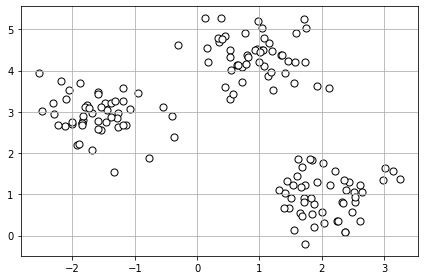

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

* k-평균 알고리즘 프로세스
    1. 샘플 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택
    2. 각 샘플을 가장 가까운 센트로이드에 할당
    3. 할당된 샘플들의 중심으로 센트로이드를 이동
    4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2와 3을 반복

* 샘플 간의 유사도 측정
    * 연속적인 특성을 가진 샘플을 클러스터로 묶는 데 사용되는 거리는 m-차원 공간에 있는 두 포인트 x와 y 사이의 **유클리디안 거리의 제곱**(squared Euclidean distance)이다.

유클리디안 거리 지표를 기반으로 간단한 최적화 문제로 k-평균 알고리즘을 기술할 수 있다. 클러스터 내 **제곱 오차합**(SSE) 또는 **클러스터 관성**(cluster inertia)을 반복적으로 최소화하는 방법이다.

In [4]:
# 사이킷런 KMeans
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # 클러스터 개수
            init='random', # 초기에 군집 중심점의 좌표를 설정하는 방식
            n_init=10, # k-평균 군집 알고리즘을 각기 다른 랜덤한 센트로이드에서 독립적으로 열 번 실행하여 가장 낮은 SSE를 만드는 하나를 최종 모델로 선택
            max_iter=300, # 한 번의 실행에서 수행할 최대 반복 횟수를 지정
            tol=1e-04, # 0.0001, 수렴을 결정하는 클러스터 내 제곱 오차합의 변화량에 대한 허용 오차 조정, 수렴에 문제가 있을 시 값을 늘린다. 
            random_state=0)

y_km = km.fit_predict(X)

k-평균의 한 가지 문제는 하나 이상의 클러스터가 비어 있을 수 있다는 점이다. 이런 문제는 k-메도이드(k-medoid)나 퍼지 C-평균(C-means)에는 나타나지 않는다.

사이킷런의 k-평균은 한 클러스터가 비어 있다면 알고리즘이 빈 클러스터의 센트로이드에서 가장 멀리 떨어진 샘플을 찾는다. 그런 다음 가장 먼 포인트에 센트로이드를 다시 할당한다.

#### 특성 스케일
* k-평균 알고리즘을 유클리디안 거리 지표를 시용하여 실제 데이터에 적용할 때 특성이 같은 스케일로 측정되었는지 확인해야한다.
* 필요 시 z-점수 표준화나 최소-최대 스케일로 변환해야 한다.

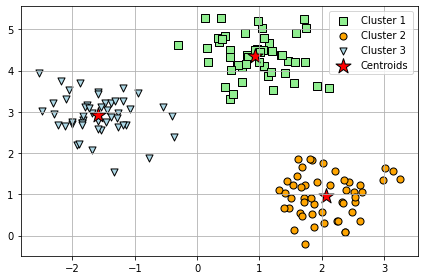

In [5]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

* k-평균 특징
    * 클러스터가 중첩되지 않고 계층적이지 않다.
    * 각 클러스터에 적어도 하나의 샘플이 있다고 가정한다.

### 11.1.2 k-평균++로 초기 클러스터 센트로이드를 똑똑하게 할당
초기 센트로이드가 좋지 않게 선택되면 나쁜 군집 결과를 만들거나 수렴이 느려진다. 이 문제를 해결하는 방법은 데이터셋에서 k-평균 알고리즘을 여러 번 실행하며 SSE 입장에서 가장 성능이 좋은 모델을 선택하는 것이다.

* k-평균++의 초기화
    1. 선택한 k개의 센트로이드를 저장한 빈 집합 M을 초기화
    2. 입력 샘플에서 첫 번째 센트로이드를 랜덤하게 선택하고 M에 할당
    3. M에 있지 않은 각 샘플 x에 대해 M에 있는 센트로이드까지 최소 제곱 거리를 찾는다.
    4. 가중치가 적용된 확률 분포를 사용하여 다음 센트로이드를 랜덤하게 선택
    5. k개의 센트로이드를 선택할 때까지 단계 3과 4를 반복한다
    6. 이후 기본 k-평균 알고리즘을 수행

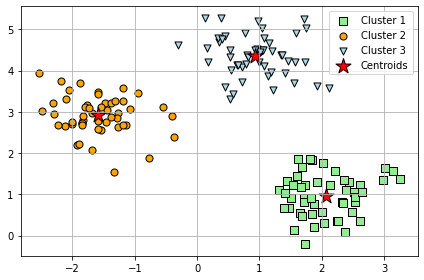

In [6]:
km_ = KMeans(n_clusters=3, # 클러스터 개수
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km_ = km_.fit_predict(X)

plt.scatter(X[y_km_ == 0, 0],
            X[y_km_ == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km_ == 1, 0],
            X[y_km_ == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km_ == 2, 0],
            X[y_km_ == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km_.cluster_centers_[:, 0],
            km_.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### 11.1.3 직접 군집 vs 간접 군집
* 직접 군집(hard clustering): 데이터셋의 샘플이 정확히 하나의 클러스터에 할당되는 알고리즘 종류
* 간접 군집(soft clustering, 퍼지 군집(fuzzy clustering)): 샘플을 하나 이상의 클러스터에 할당
    * ex) 퍼지 C-평균(Fuzzy C-Means, FCM)(간접 k-평균 또는 퍼지 k-평균)

### 11.1.4 엘보우 방법을 사용하여 최적의 클러스터 개수 찾기
* 군집 품질을 평가하려면 알고리즘 자체의 지표를 사용해야 한다.
    * ex) k-평균 군집의 성능을 비교하기 위해 클래스 내 SSE(왜곡)를 사용.
    


In [7]:
# 사이킷런 KMeans 모델의 SSE -> inertia_
print('왜곡: %.2f' % km.inertia_)

왜곡: 72.48


클래스 내 SSE를 바탕으로 **엘보우 방법**이라고 하는 그래프를 사용하여 문제에 최적인 클러스터 개수 k를 추정할 수 있다. 직관적으로 생각했을 때 k가 증가하면 왜곡은 줄어들 것이다. 샘플이 할당된 센트로이드에 더 가까워지기 때문이다. 엘보우 방법 이면에 있는 아이디어는 왜곡이 빠르게 증가하는 지점의 k 값을 찾는 것이다.

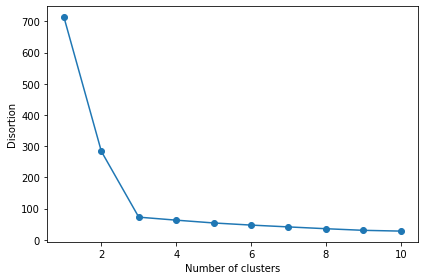

In [8]:
# k 값을 바꾸어 가며 왜곡 값을 그래프로 시각화
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Disortion')
plt.tight_layout()
plt.show()

* k=3에서 엘보우가 나타난다. 즉, 이 데이터셋에서는 k=3이 좋은 선택임을 알 수 있다.

### 11.1.5 실루엣 그래프로 군집 품질을 정량화
* 실루엣 분석(silhouette analysis)
    * 군집 품질 평가
    * k-평균 이외 다른 군집 알고리즘에도 적용 가능
    * 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지를 측정하는 그래프 도구
    * 실루엣 계수를 계산하기 위한 단계
        1. 샘플 x와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균화하여 클러스터 응집력을 계산
        2. 샘플 x와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 클러스터 분리도를 계산
        3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나누어 실루엣 계산
    * 실루엣 계수는 -1과 1사이의 값을 가진다.
        * 응집력과 분리도가 같으면 실루엣 계수는 0
        * 이상적인 실루엣 계수는 1에 가깝다

In [9]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

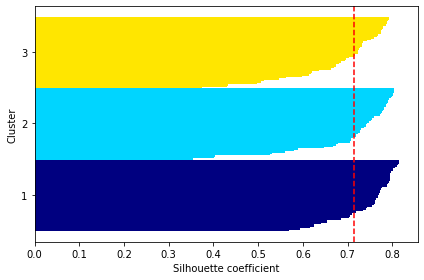

In [10]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

실루엣 그래프를 보면 클러스터 크기를 확인하고 이상치를 가진 클러스터를 구별할 수 있다.

실루엣 계수의 값이 0에서 멀리 떨어져 있다. 이는 군집이 잘 되었다는 것을 나타낸다.

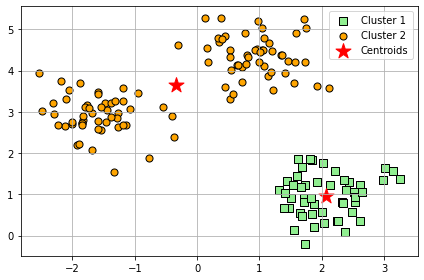

In [11]:
# 잘못된 클러스터링
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

하나의 센트로이드가 세 개의 원형 샘플 그룹 중 두 개 사이에 놓여 있다.

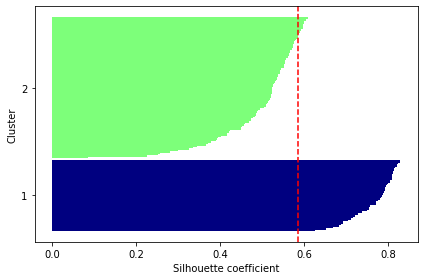

In [12]:
cluster_labels =np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

실루엣 그래프에서 보이듯 길이와 두께가 확실히 다르다. 이는 군집 결과가 나쁘거나 적어도 최적이 아니라는 뜻이다.

In [13]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

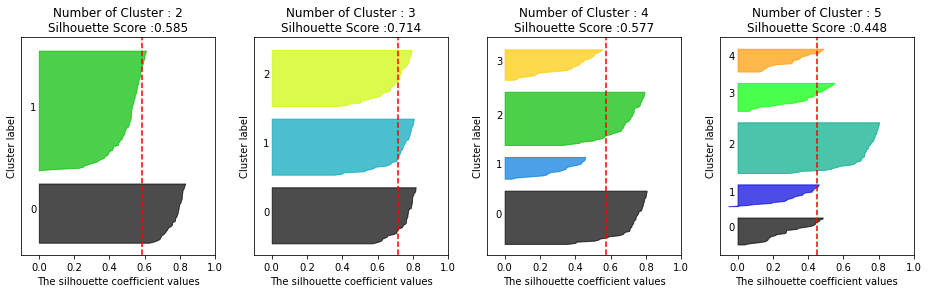

In [14]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
visualize_silhouette([2, 3, 4, 5], X)